In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

#Own Files
import MouseDrawing as md

## Trajectory
The path the car needs to follow is a i input into for that Optimization Porblem. The get test the Opimizer i created two way of of creating the this curve-funktion.

    1. Using analytical Equations where you define f_x and f_y
    2. Using my python script, by drawing a path in a canvis
       and exacting it using polinomial Regression

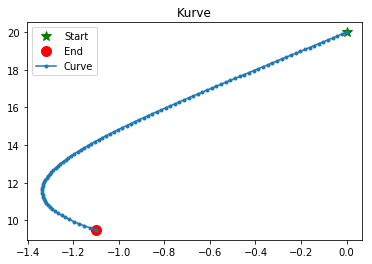

Accuracy List x  : 0.9998179944465339
Accuracy List y  : 0.9996636995452122

Coefficient X:
 [ 0.00000000e+00  1.35975255e+05 -9.23332594e+06  2.67464221e+08
 -4.46716729e+09  4.87500956e+10 -3.71820240e+11  2.06285082e+12
 -8.52392860e+12  2.65350733e+13 -6.22011038e+13  1.07921461e+14
 -1.31481077e+14  9.37179609e+13  4.60828164e+12 -1.03447708e+14
  1.36793090e+14 -1.00829439e+14  4.58185542e+13 -1.20659208e+13
  1.41918452e+12] 
--------
Coefficient Y:
 [ 0.00000000e+00  9.04811054e+04 -6.62819995e+06  2.06821566e+08
 -3.70806530e+09  4.31445047e+10 -3.48201911e+11  2.02916360e+12
 -8.74845824e+12  2.82511329e+13 -6.83714356e+13  1.22053374e+14
 -1.52814310e+14  1.12779198e+14  1.42954093e+12 -1.20752557e+14
  1.64024470e+14 -1.22806130e+14  5.64699202e+13 -1.50162029e+13
  1.78086042e+12]


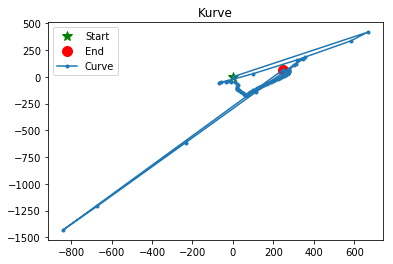

In [3]:
#1.Analytic Trajectory (Boundary condition)
def fx(delta): #delta von 0-1;
    return -0.1*delta**2-delta*2+delta**5;

def fy(delta):
    return -0.01*delta**4-0.5*delta**2-10*delta**1+20;

c1=md.curve(fx,fy)
md.drawTrack(curve=c1)


# 2. Drawing in Canvis
c2=md.drawTrack()

In [11]:
class model:
    
    
    g=9.81 
    mu=0.75 #should be dynamic in the future
    
    
    def __init__(self,x,M,maxP,step):
        
        #Changing Variable
        self.gamma=0
        self.Fres=0
        
        #Global States (States to another Coordination System)
        #gX[0]: X-Coordinate
        #gX[1]: Y-Coordinate
        #gX[2]: Angle  0° is left, 90° is up usw.
        
        gX[0]=0
        gX[1]=0
        gX[2]=0 # Needs to change to be tangent to curve
        
        
        
        #States
         #x[0]: Longitudinal vehicle velocity. 
         #x[1]: Lateral vehicle velocity. 
         #x[2]: Yaw rate. 
        
        self.states[0]=x[0]
        self.states[1]=x[1]
        self.states[2]=x[2]
        
        #Final parameters
        self.M=M
        self.maxP=maxP
        self.step
        
        #Initalising States and Dot_States
        self.dot_states=np.zeros(3)
        
        
        
   #Gets and Sets     
    def get_states(self):
        return self.states
    def get_dot_states(self):
        return self.dot_states
    def set_states(self,x,y,v):
        self.states[0]=x
        self.states[1]=y
        self.states[2]=v
    
    def eval_dot(self):
        self.dot_states[0]=self.states[2]*math.cos(self.gamma)
        self.dot_states[1]=self.states[2]*math.sin(self.gamma)
        self.dot_states[2]=self.Fres/self.M
        
    def update_model(self,Fres,gamma):
        self.gamma=gamma;
        self.Fres=Fres;
        self.eval_dot()
        self.states=self.states+self.dot_states*1
    
    
    def updateGlobalStates(self,xdot_states,gX):
        
        #Calculate Time for discret timestep
        t=getTime()
        
        
        
        gX[0]=self.step
        gX[1]=self.step*math.cos()
        
    
    def Force_constraints(self,x):
        global mu,g
        #x[0]=v
        #x[1]=gamma
            
         '''Zum Zeitpunkt xk (v,und lenkrichtung)
         
         '''
            
            Fres=self.M*g*mu  #Reibwertänderung / Downforce
            Fres_x=self.maxP/x[0]
            
            Fres_y
        
        
        
        return Fres_x*math.cos(self.gamma)
    
    
    def __repr__(self):
        a="--------Model--------"
        b="".join(["States: \n", "  X-Position:\t",str(self.states[0]),"\n  Y-Postion:\t",str(self.states[1]),"\n  Velocity:\t",str(self.states[2])])
        c="".join(["Dot_States: \n","  X_Dot:\t",str(self.dot_states[0]),"\n  Y_Dot:\t",str(self.dot_states[1]),"\n  Acceleration:\t",str(self.dot_states[2]),"\n"])
        return "\n".join([a,b,c])
m1=model(c1,2000,500)   

SyntaxError: invalid syntax (<ipython-input-11-db7b1bc4420e>, line 6)

In [5]:
def eval_time(v_vector,segment_length):
    time_array=[segment_length/v for v in v_vector]
    return sum(time_array)
    



for i in range(1):
    m1.update_model(100,math.pi*1/4)
    m1.update_model(100,0)
    m1.update_model(-100,0)
    m1
    time.sleep(0.1)

In [6]:
m1

--------Model--------
States: 
  X-Position:	0.15000000000000002
  Y-Postion:	0.0
  Velocity:	0.05
Dot_States: 
  X_Dot:	0.1
  Y_Dot:	0.0
  Acceleration:	-0.05